# ***Modelo XGBClassifier***

El XGBoost (Extreme Gradient Boosting) es un modelo de aprendizaje supervisado basado en árboles de decisión optimizados.

Su objetivo principal es:

Predecir una variable categórica (clasificación) o continua (regresión) usando una combinación eficiente y optimizada de muchos árboles de decisión débiles.

In [3]:
%load_ext kedro.ipython 

The kedro.ipython extension is already loaded. To reload it, use:
  %reload_ext kedro.ipython


In [4]:
catalog.keys()


[
    'DataSetFIFA22',
    'DataSetFIFA21',
    'DataSetFIFA20',
    'preprocess_fifa_22',
    'preprocess_fifa_21',
    'preprocess_fifa_20',
    'FIFA22_processed_con_transformacion2_columns',
    'FIFA21_processed_con_transformacion2_columnss',
    'FIFA20_processed_con_transformacion2_columns',
    'model_input_table',
    'parameters'
]

In [5]:
catalog.load("model_input_table")

[10/27/25 01:05:03] INFO     Loading data from model_input_table (ParquetDataset)...           ]8;id=585847;file://C:\Users\brand\Downloads\Proyecto_ML_Kedro\machine-learning-project\.venv\Lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=238672;file://C:\Users\brand\Downloads\Proyecto_ML_Kedro\machine-learning-project\.venv\Lib\site-packages\kedro\io\data_catalog.py#1046\1046]8;;\

,Name,Age,Nationality,Overall,Potential,Club,Special,Preferred Foot,International Reputation,Weak Foot,...,Height_cm,Weight_kg,Value_num,Wage_num,Release Clause_num,Best_Position_Grouped_FW,Best_Position_Grouped_GK,Best_Position_Grouped_MF,Overall_Class_Encoded,Year
0,Bruno Fernandes,26,Portugal,88,89,Manchester United,2341,Right,3.0,3.0,...,179,69.000000,107500000.0,250000.0,206900000.0,False,False,True,0,2022
1,L. Goretzka,26,Germany,87,88,FC Bayern München,2314,Right,4.0,4.0,...,189,82.000000,93000000.0,140000.0,160400000.0,False,False,True,0,2022
2,L. Suárez,34,Uruguay,88,88,Atlético de Madrid,2307,Right,5.0,4.0,...,182,83.000000,44500000.0,135000.0,91200000.0,True,False,False,0,2022
3,M. Acuña,29,Argentina,84,84,Sevilla FC,2292,Left,2.0,3.0,...,172,69.000000,37000000.0,45000.0,77700000.0,False,False,False,2,2022
4,J. Kimmich,26,Germany,89,90,FC Bayern München,2283,Right,4.0,4.0,...,177,75.000000,108000000.0,160000.0,186300000.0,False,False,True,0,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50521,V. Storsve,17,Norway,50,72,Lillestrøm SK,773,Right,1.0,2.0,...,185,64.863656,50000.0,5000.0,113000.0,False,True,False,1,2020
50522,B. Sinzig,19,Switzerland,50,60,Neuchâtel Xamax,764,Right,1.0,2.0,...,190,81.192968,35000.0,5000.0,58000.0,False,True,False,1,2020
50523,18 N. Krucker,18,Switzerland,50,61,FC St. Gallen,757,Right,1.0,3.0,...,183,79.832192,35000.0,1000.0,66000.0,False,True,False,1,2020
50524,18 A. Viscovo,18,Italy,51,70,Crotone,755,Right,1.0,2.0,...,190,78.925008,60000.0,5000.0,146000.0,False,True,False,1,2020


In [6]:
df_FIFA = catalog.load("model_input_table")

                    INFO     Loading data from model_input_table (ParquetDataset)...           ]8;id=630105;file://C:\Users\brand\Downloads\Proyecto_ML_Kedro\machine-learning-project\.venv\Lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=588306;file://C:\Users\brand\Downloads\Proyecto_ML_Kedro\machine-learning-project\.venv\Lib\site-packages\kedro\io\data_catalog.py#1046\1046]8;;\

#### **Importaciones**

In [7]:
# -- Tratamiento de datos --
import numpy as np
import pandas as pd

# -- Gráficos -- 
import seaborn as sns
from matplotlib import style
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
import seaborn as sb

# -- Procesado y modelado --
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier, plot_importance

# -- Metricas para modelos de clasificación --
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics

#----  Curva ROC y PR ----
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.metrics import precision_recall_curve, PrecisionRecallDisplay, average_precision_score

# -- GridSearchCV -- 
from sklearn.model_selection import GridSearchCV

## **Desarrollo del Modelo XGBClassifier**

#### **Selección de caracteristicas**

In [8]:
X = df_FIFA[['Potential','BallControl']]
y = df_FIFA['Best_Position_Grouped_MF']

#### **División de los datos en entrenamiento y prueba**

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.20 ,random_state=42)

#### **Creación y entrenamiento del modelo XGBClassifier**

In [10]:
xgb_model = XGBClassifier(
    random_state=42,
    eval_metric='logloss'  # evita warning y mide pérdida logarítmica
)
xgb_model.fit(X_train, y_train)

,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,'logloss'


#### **Predicciones sobre el conjunto de prueba**

In [11]:
y_pred = xgb_model.predict(X_test)

### **Métricas de evaluación**

In [12]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[4641 1511]
 [1804 2150]]
              precision    recall  f1-score   support

       False       0.72      0.75      0.74      6152
        True       0.59      0.54      0.56      3954

    accuracy                           0.67     10106
   macro avg       0.65      0.65      0.65     10106
weighted avg       0.67      0.67      0.67     10106



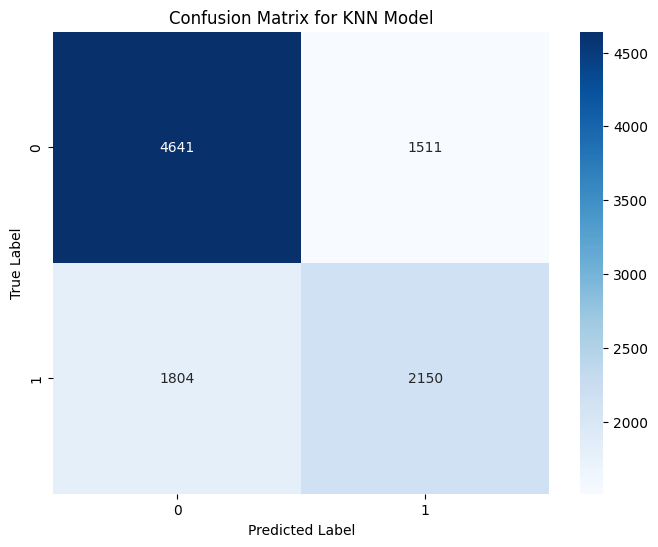

In [13]:
plt.figure(figsize=(8, 6))
sb.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for KNN Model")
plt.show()

In [14]:
#creo que funciona para binarias 
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

# Calculate Sensitivity (Recall)
sensitivity = tp / (tp + fn)

# Calculate Specificity
specificity = tn / (tn + fp)

print(f"Sensitivity (Recall): {sensitivity:.2f}")
print(f"Specificity: {specificity:.2f}")

Sensitivity (Recall): 0.54
Specificity: 0.75


<Figure size 1000x600 with 0 Axes>

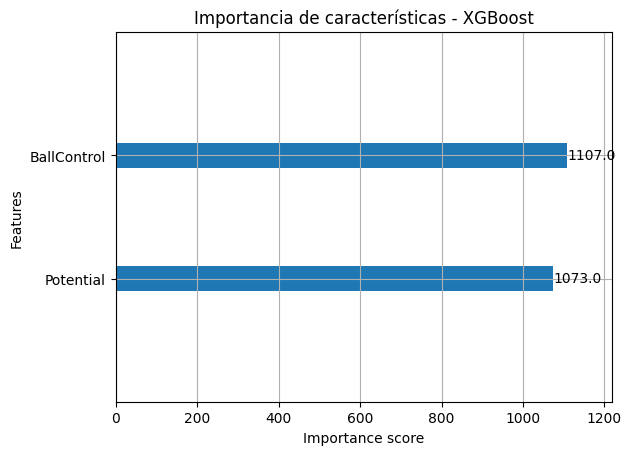

In [15]:
plt.figure(figsize=(10, 6))
plot_importance(xgb_model, max_num_features=10)
plt.title("Importancia de características - XGBoost")
plt.show()


### **GridsearchCV**

In [ ]:
from xgboost import XGBClassifier, plot_importance
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sb

# Parámetros para GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.3],
    'subsample': [0.8, 1],
    'colsample_bytree': [0.8, 1]
}

# Configuración del GridSearch
grid_search = GridSearchCV(
    XGBClassifier(eval_metric='logloss', random_state=42),
    param_grid,
    cv=5,
    scoring='accuracy',
    verbose=1
)

# Entrenamiento con los datos de entrenamiento
grid_search.fit(X_train, y_train)

# Obtener el mejor modelo
best_model = grid_search.best_estimator_

# Predicciones con el mejor modelo
y_pred_gs = best_model.predict(X_test)

# --- RESULTADOS ---

# Mostrar métricas de clasificación para el mejor modelo
print("\nClassification Report con los mejores parámetros:")
print(classification_report(y_test, y_pred_gs))

print("\nConfusion Matrix con los mejores parámetros:")
plt.figure(figsize=(8, 6))
sb.heatmap(confusion_matrix(y_test, y_pred_gs), annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for KNN Model")
plt.show()

print("\nAccuracy Score (Grid Search):")
print(accuracy_score(y_test, y_pred_gs))

#### **Sensitivity y Specificity modelo con GridSearchCV**

In [ ]:
cm_best = confusion_matrix(y_test, y_pred_gs)

TN_best = cm_best[0, 0]
FP_best = cm_best[0, 1]
FN_best = cm_best[1, 0]
TP_best = cm_best[1, 1]

sensitivity_best = TP_best / (TP_best + FN_best)
specificity_best = TN_best / (TN_best + FP_best)

print(f"\nSensitivity (Best Model): {sensitivity_best:.4f}")
print(f"Specificity (Best Model): {specificity_best:.4f}")

### **Curva Roc y Curva PR de GridSearchCV**

### **Curva Roc y Curva PR de GridSearchCV**

In [ ]:
# Probabilidades para la clase positiva
y_pred_proba = best_knn.predict_proba(X_test)[:, 1]

# === CURVA ROC ===
fpr, tpr, thresholds_roc = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC del Mejor Modelo (KNN)')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

print("-")
# === CURVA PRECISIÓN-RECALL ===
precision, recall, thresholds_pr = precision_recall_curve(y_test, y_pred_proba)
average_precision = average_precision_score(y_test, y_pred_proba)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', lw=2, label='Curva PR (AP = %0.2f)' % average_precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Curva Precision-Recall del Mejor Modelo (KNN)')
plt.legend(loc="lower left")
plt.grid(True)
plt.show()